#### Problem Statement

New cars cannot be afforded by most of the people due to various factors, so all these customers opt for a used car with best features due to which the demand for used cars is always increasing. To stay in the market competition we should always offer a best price which is best to both to customer and the owner. The model we are going to create would help us in identifying the price of the car based the parameters that we would be passing would help us tag a better price on the car.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,accuracy_score
from sklearn.metrics import auc,make_scorer,precision_recall_curve,log_loss
from sklearn.model_selection import cross_val_score
from numpy import mean, std
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import PowerTransformer, Normalizer
from sklearn.feature_selection import mutual_info_regression
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import skew, kurtosis
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data into a dataframe
cars_df = pd.read_csv("cars_dataset.csv")
cars_df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
5,A1,2016,13900,Automatic,32260,Petrol,30.0,58.9,1.4,audi
6,A6,2016,13250,Automatic,76788,Diesel,30.0,61.4,2.0,audi
7,A4,2016,11750,Manual,75185,Diesel,20.0,70.6,2.0,audi
8,A3,2015,10200,Manual,46112,Petrol,20.0,60.1,1.4,audi
9,A1,2016,12000,Manual,22451,Petrol,30.0,55.4,1.4,audi


In [3]:
# Check the dimension of the table
print("The dimension of the table is: ", cars_df.shape)

# What type of variables are in the table 
print("Describe Data")
print(cars_df.describe())

The dimension of the table is:  (72435, 10)
Describe Data
               year          price        mileage           tax           mpg  \
count  72435.000000   72435.000000   72435.000000  72435.000000  72435.000000   
mean    2017.073666   16580.158708   23176.517057    116.953407     55.852480   
std        2.101252    9299.028754   21331.515562     64.045533     17.114391   
min     1996.000000     495.000000       1.000000      0.000000      0.300000   
25%     2016.000000   10175.000000    7202.500000     30.000000     47.900000   
50%     2017.000000   14495.000000   17531.000000    145.000000     55.400000   
75%     2019.000000   20361.000000   32449.000000    145.000000     62.800000   
max     2020.000000  145000.000000  323000.000000    580.000000    470.800000   

         engineSize  
count  72435.000000  
mean       1.635650  
std        0.561535  
min        0.000000  
25%        1.200000  
50%        1.600000  
75%        2.000000  
max        6.600000  


In [4]:
# Check if any missing values
np.sum(np.sum(cars_df.isna()))

0

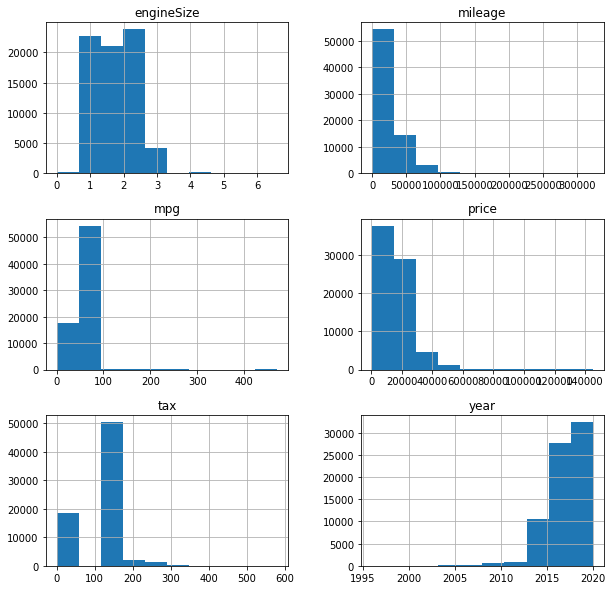

In [5]:
cars_df.hist(figsize=(10,10))
plt.show()

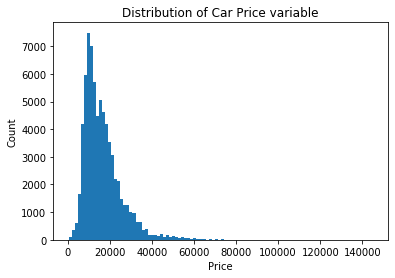

In [6]:
# Plot histogram to identify any outlier that is visual to eye
plt.hist(cars_df['price'], bins=100)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Distribution of Car Price variable');

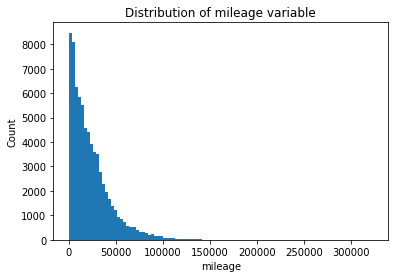

In [7]:
plt.hist(cars_df['mileage'], bins=100)
plt.ylabel('Count')
plt.xlabel('mileage')
plt.title('Distribution of mileage variable');

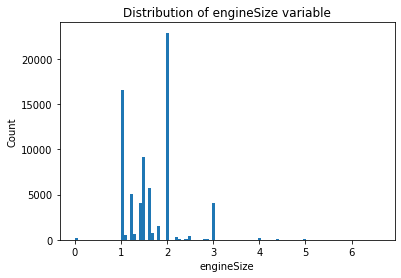

In [8]:
plt.hist(cars_df['engineSize'], bins=100)
plt.ylabel('Count')
plt.xlabel('engineSize')
plt.title('Distribution of engineSize variable');

#### Removing the 0 engine size which doesnt make any sense

In [9]:
cars_df = cars_df.drop(cars_df.loc[cars_df['engineSize'] < 1].index)

In [10]:
np.sum(cars_df['engineSize'] < 1)

0

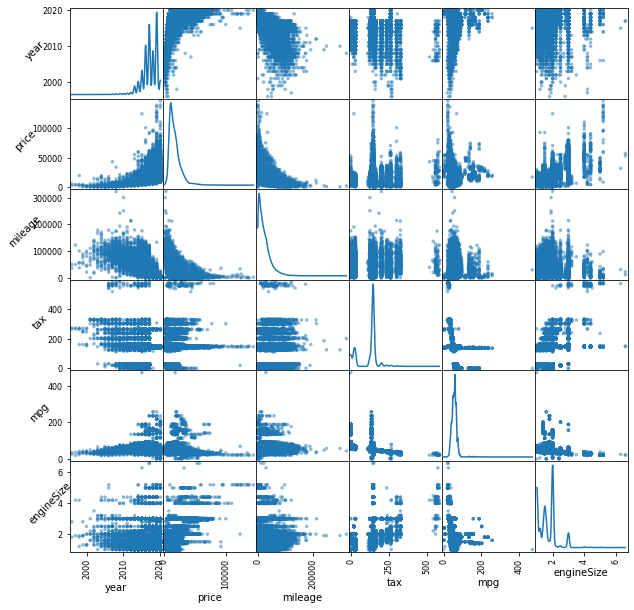

In [11]:
# Scatter plot of the variables
axes = pd.plotting.scatter_matrix(cars_df, figsize=(10, 10), s=50, diagonal='kde')
for ax in axes.flatten():
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=45)
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)

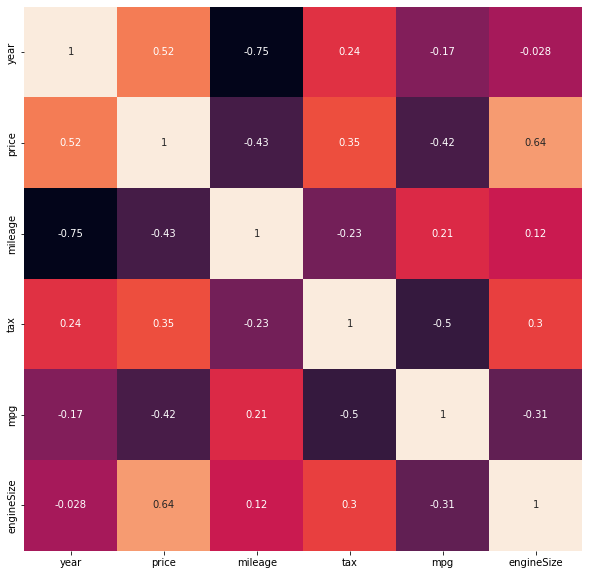

In [12]:
# Correlation of the variables
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cars_df.corr(),annot=True,cbar=False,ax=ax)
plt.show()

In [13]:
sampleDataSetMain = pd.DataFrame()
sampleDataSet = pd.DataFrame()
count = 0

years = sorted(cars_df.year.unique())
for i in years:
    #print(i)
    count = sum(cars_df['year'].eq(i))
    if count > 75 :
                sam = 75
    else:
                sam = count
    #print('hi')
    sampleDataSet = cars_df[cars_df['year'].eq(i)].sample(n=sam, replace=True)
    #print(sampleDataSet)
    sampleDataSetMain = sampleDataSetMain.append(sampleDataSet)
    #print(sampleDataSetMain)    
    
print(sampleDataSetMain.shape)
print(sampleDataSetMain.head())

sampleDataSetMain=sampleDataSetMain.dropna()

(1265, 10)
           model  year  price transmission  mileage fuelType    tax   mpg  \
38327     Escort  1996   3000       Manual    50000   Petrol  265.0  34.4   
20293   5 Series  1996   5995    Automatic    36000   Petrol  270.0  26.4   
10427         A8  1997   4650    Automatic   122000   Petrol  265.0  18.9   
20509         Z3  1997   3950       Manual    49000   Petrol  270.0  35.3   
9788          A3  1998   4999    Automatic    55000   Petrol  265.0  30.4   

       engineSize  Make  
38327         1.8  Ford  
20293         2.8   BMW  
10427         4.2  audi  
20509         1.9   BMW  
9788          1.8  audi  


In [14]:
# Check if any missing values
np.sum(np.sum(sampleDataSetMain.isna()))

0

In [15]:
#y = cars_df['price']
#x = cars_df.drop(columns=['price','model'])
#print(x)
y = sampleDataSetMain['price']
x = sampleDataSetMain.drop(columns=['price','model','fuelType','transmission', 'Make'])
print(x)

       year  mileage    tax   mpg  engineSize
38327  1996    50000  265.0  34.4         1.8
20293  1996    36000  270.0  26.4         2.8
10427  1997   122000  265.0  18.9         4.2
20509  1997    49000  270.0  35.3         1.9
9788   1998    55000  265.0  30.4         1.8
...     ...      ...    ...   ...         ...
16491  2020      151  150.0  62.8         2.0
45109  2020       10  145.0  49.6         1.6
46862  2020     5129  145.0  46.3         1.0
4762   2020     5000  145.0  39.8         1.5
47811  2020     5000  145.0  45.6         1.0

[1265 rows x 5 columns]


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
# Details of training dataset
print("Shape of x_train dataset: ", x_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of x_test dataset: ", x_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

Shape of x_train dataset:  (1012, 5)
Shape of y_train dataset:  (1012,)
Shape of x_test dataset:  (253, 5)
Shape of y_test dataset:  (253,)


In [18]:
numerical_ix = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = x_train.select_dtypes(include=['object', 'bool']).columns

print(numerical_ix)
print(categorical_ix)

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')
Index([], dtype='object')


In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV
t = [('cat', OneHotEncoder(), categorical_ix),
     ('num', PowerTransformer(method = 'yeo-johnson'), numerical_ix)]

col_transform = ColumnTransformer(transformers=t)

print(col_transform)

ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                 Index([], dtype='object')),
                                ('num', PowerTransformer(),
                                 Index(['year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object'))])


#### Model Evaluation

In [20]:
# define the data preparation and modeling pipeline
def pipeline_model(model):
    pipeline = Pipeline(steps=[('prep',col_transform), ('model', model)])
    return(pipeline)

In [21]:
cv = KFold(n_splits=3, shuffle=True, random_state=1)

models = [RandomForestRegressor(),
          SVR(),
          Ridge(),
          LinearRegression(),
          Lasso(),
          ElasticNet()
         ]

score_list = []
for _, model_ in enumerate(models):
    model = TransformedTargetRegressor(regressor=pipeline_model(model_),
                                 func=np.log1p, inverse_func=np.expm1)
    
    scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs = -1, verbose = 2)
    
    final_score = np.mean(scores)
    
    score_list.append(final_score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [22]:
model_name_list = ['Random Forest Regressor',
          'Support Vector Machine - Regressor',
          'Ridge Regressor',
          'Linear Regression',
          'Lasso Regression',
          'ElasticNet Regression']

results = pd.DataFrame(
    {'Model type': model_name_list,
     'Mean Score (R^2)': score_list})

results

,Model type,Mean Score (R^2)
0,Random Forest Regressor,0.885987
1,Support Vector Machine - Regressor,0.877373
2,Ridge Regressor,0.851423
3,Linear Regression,0.850841
4,Lasso Regression,-0.104605
5,ElasticNet Regression,0.043313


In [23]:
pipeline = Pipeline(steps=[('prep',col_transform), ('model', RandomForestRegressor())])

model = TransformedTargetRegressor(regressor=pipeline, func=np.log1p, inverse_func=np.expm1)
    
model.fit(x_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('prep',
                                                      ColumnTransformer(transformers=[('cat',
                                                                                       OneHotEncoder(),
                                                                                       Index([], dtype='object')),
                                                                                      ('num',
                                                                                       PowerTransformer(),
                                                                                       Index(['year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object'))])),
                                                     ('model',
                                                      RandomForestRegressor())]))

In [24]:
y_pred = model.predict(x_test)
y_test = y_test.to_numpy()

r2_score(y_pred, y_test)

0.9024168512589992